In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
credit_df=pd.read_csv("German_Credit_Dataset.csv")

In [3]:
credit_df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [41]:
for feature in credit_df.columns:
    if credit_df[feature].dtype =='object' :
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes
        
credit_df.head()       

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0


In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null int8
months_loan_duration    1000 non-null int64
credit_history          1000 non-null int8
purpose                 1000 non-null int8
amount                  1000 non-null int64
savings_balance         1000 non-null int8
employment_duration     1000 non-null int8
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null int8
housing                 1000 non-null int8
existing_loans_count    1000 non-null int64
job                     1000 non-null int8
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(10)
memory usage: 64.5 KB


In [8]:
x = credit_df.drop("default", axis = 1)
y = credit_df.pop("default")

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size = .30, random_state = 123)

In [11]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [12]:
dt_model.fit(x_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
from sklearn import tree

In [14]:
train_char_label = ['No','Yes']

In [15]:
Credit_tree_file = open('D:\Credit_tree.dot','w')

In [16]:
dot_data = tree.export_graphviz(dt_model, out_file=Credit_tree_file, feature_names=list(x_train), class_names=train_char_label)

In [17]:
Credit_tree_file.close()

In [18]:
dt_model_pruned = DecisionTreeClassifier(criterion='gini', max_depth= 7, min_samples_leaf=10, min_samples_split=30)

In [19]:
dt_model_pruned.fit(x_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
Credit_tree_file_pruned = open('D:\Credit_tree_pruned.dot','w')

In [21]:
dot_data = tree.export_graphviz(dt_model_pruned, out_file=Credit_tree_file_pruned, feature_names=list(x_train), class_names=train_char_label)

In [22]:
Credit_tree_file_pruned.close()

In [23]:
dt_model_pruned.feature_importances_

array([0.38726858, 0.24344436, 0.01383133, 0.03999815, 0.12058325,
       0.05854921, 0.        , 0.01420548, 0.        , 0.07560472,
       0.0110768 , 0.03543812, 0.        , 0.        , 0.        ,
       0.        ])

In [24]:
##Gini-gain contribution:
print (pd.DataFrame(dt_model_pruned.feature_importances_, columns = ["Imp"], index = x_train.columns))

                           Imp
checking_balance      0.387269
months_loan_duration  0.243444
credit_history        0.013831
purpose               0.039998
amount                0.120583
savings_balance       0.058549
employment_duration   0.000000
percent_of_income     0.014205
years_at_residence    0.000000
age                   0.075605
other_credit          0.011077
housing               0.035438
existing_loans_count  0.000000
job                   0.000000
dependents            0.000000
phone                 0.000000


In [25]:
ytrain_predict = dt_model_pruned.predict(x_train)
ytest_predict = dt_model_pruned.predict(x_test)

In [26]:
ytrain_predict_proba = dt_model_pruned.predict_proba(x_train)
ytest_predict_proba = dt_model_pruned.predict_proba(x_test)

In [27]:
probs_train =  ytrain_predict_proba[:,1]
probs_test =  ytest_predict_proba[:,1]

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

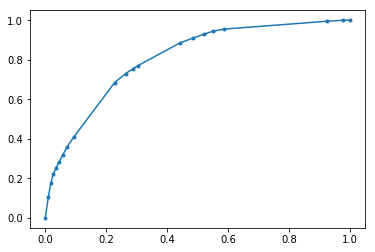

In [29]:
fpr, tpr, thresholds = roc_curve(train_labels, probs_train)
plt.plot(fpr, tpr, marker='.')
plt.show()

In [30]:
#AUC for train dataset
auc_train = roc_auc_score(train_labels, probs_train)
auc_train

0.806615

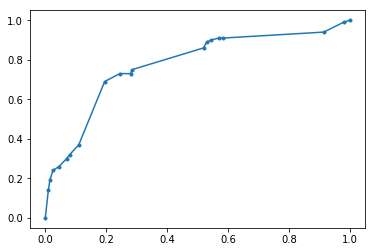

In [31]:
fpr, tpr, thresholds = roc_curve(test_labels, probs_test)
plt.plot(fpr, tpr, marker='.')
plt.show()

In [32]:
#AUC for test dataset
auc_test = roc_auc_score(test_labels, probs_test)
auc_test

0.7744249999999999

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
##classification_report of tarining data
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       500
           1       0.67      0.36      0.47       200

   micro avg       0.77      0.77      0.77       700
   macro avg       0.73      0.64      0.66       700
weighted avg       0.75      0.77      0.74       700



In [35]:
##classification_report of test data
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       200
           1       0.67      0.32      0.43       100

   micro avg       0.72      0.72      0.72       300
   macro avg       0.70      0.62      0.62       300
weighted avg       0.71      0.72      0.69       300



In [36]:
##Confusion_matrix of train data
confusion_matrix(train_labels, ytrain_predict)

array([[464,  36],
       [128,  72]], dtype=int64)

In [37]:
##Confusion_matrix of test data
confusion_matrix(test_labels, ytest_predict)

array([[184,  16],
       [ 68,  32]], dtype=int64)

In [38]:
##Accuracy of training data
dt_model_pruned.score(x_train,train_labels)

0.7657142857142857

In [39]:
##Accuracy of test data
dt_model_pruned.score(x_test,test_labels)

0.72